In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import pipeline
from sklearn.preprocessing import RobustScaler,PowerTransformer,MinMaxScaler,StandardScaler
from sklearn.impute import SimpleImputer as Imputer


## BUILDING PIPELINE

In [23]:
num_pipeline=([('imputer',Imputer(strategy='mean')),('power_transformer',PowerTransformer()),
    ('min_max_scaler',MinMaxScaler()),('scaler',RobustScaler()),])

In [24]:
credit = pd.read_csv('F:\\Downloads\\dseb-63-data-preparation-final-project\\dseb63_final_project_DP_dataset\\dseb63_credit_card_balance.csv')

In [25]:
credit

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,...,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0,87788
1,2582071,-82,16809.210,67500,0.0,0.0,0.0,0.0,3375.0,9000.0,...,16809.210,0.0,0,0.0,0.0,18.0,Active,0,0,87788
2,2582071,-84,27577.890,67500,0.0,0.0,0.0,0.0,3375.0,4500.0,...,27577.890,0.0,0,0.0,0.0,16.0,Active,0,0,87788
3,2582071,-7,65159.235,45000,0.0,0.0,0.0,0.0,2250.0,2250.0,...,65609.235,0.0,0,0.0,0.0,63.0,Active,0,0,87788
4,2582071,-59,70475.850,67500,24750.0,24750.0,0.0,0.0,3375.0,4500.0,...,70475.850,4.0,4,0.0,0.0,41.0,Active,0,0,87788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227960,1551072,-1,0.000,202500,NaN,0.0,NaN,NaN,0.0,NaN,...,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,259579
3227961,2339982,-1,0.000,45000,0.0,0.0,0.0,0.0,0.0,NaN,...,0.000,0.0,0,0.0,0.0,0.0,Active,0,0,220697
3227962,2720102,-1,0.000,225000,NaN,0.0,NaN,NaN,0.0,NaN,...,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,93573
3227963,1897864,-2,0.000,270000,NaN,0.0,NaN,NaN,0.0,NaN,...,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,11072


## APPLYING FEATURES

In [26]:
credit['AMT_DRAWING_SUM'] = credit['AMT_DRAWINGS_ATM_CURRENT'] + credit['AMT_DRAWINGS_CURRENT'] + credit['AMT_DRAWINGS_OTHER_CURRENT'] + credit['AMT_DRAWINGS_POS_CURRENT']
credit['CNT_DRAWING_SUM'] = credit['CNT_DRAWINGS_ATM_CURRENT'] + credit['CNT_DRAWINGS_CURRENT'] + credit['CNT_DRAWINGS_OTHER_CURRENT'] + credit['CNT_DRAWINGS_POS_CURRENT'] + credit['CNT_INSTALMENT_MATURE_CUM']


In [27]:
credit = credit.drop(columns=['AMT_RECEIVABLE_PRINCIPAL','AMT_RECIVABLE','AMT_TOTAL_RECEIVABLE','NAME_CONTRACT_STATUS'])

In [28]:
credit

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,SK_ID_CURR,AMT_DRAWING_SUM,CNT_DRAWING_SUM
0,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,...,1.0,1,0.0,0.0,69.0,0,0,87788,4500.0,71.0
1,2582071,-82,16809.210,67500,0.0,0.0,0.0,0.0,3375.0,9000.0,...,0.0,0,0.0,0.0,18.0,0,0,87788,0.0,18.0
2,2582071,-84,27577.890,67500,0.0,0.0,0.0,0.0,3375.0,4500.0,...,0.0,0,0.0,0.0,16.0,0,0,87788,0.0,16.0
3,2582071,-7,65159.235,45000,0.0,0.0,0.0,0.0,2250.0,2250.0,...,0.0,0,0.0,0.0,63.0,0,0,87788,0.0,63.0
4,2582071,-59,70475.850,67500,24750.0,24750.0,0.0,0.0,3375.0,4500.0,...,4.0,4,0.0,0.0,41.0,0,0,87788,49500.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227960,1551072,-1,0.000,202500,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,0,NaN,NaN,0.0,0,0,259579,NaN,NaN
3227961,2339982,-1,0.000,45000,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0,0.0,0.0,0.0,0,0,220697,0.0,0.0
3227962,2720102,-1,0.000,225000,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,0,NaN,NaN,0.0,0,0,93573,NaN,NaN
3227963,1897864,-2,0.000,270000,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,0,NaN,NaN,0.0,0,0,11072,NaN,NaN


## APPLYING PIPELINE

In [29]:
new_credit = pd.DataFrame(pipeline.Pipeline(num_pipeline).fit_transform(credit))

In [30]:
new_credit

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.689611,1.166612,0.763422,-0.616278,0.585342,0.000328,0.000000,0.00000,0.397156,-0.294735,...,1.377511,0.952329,0.000000,0.0,1.080014,0.0,0.0,-0.452838,0.474866,1.538984
1,0.689611,-0.825686,0.268890,-0.363129,0.000000,0.000000,0.000000,0.00000,0.442289,0.151459,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,-0.452838,0.000000,-0.409677
2,0.689611,-0.847902,0.395784,-0.363129,0.000000,0.000000,0.000000,0.00000,0.442289,-0.086340,...,0.000000,0.000000,0.000000,0.0,-0.071662,0.0,0.0,-0.452838,0.000000,-0.529748
3,0.689611,0.689032,0.774426,-0.616278,0.000000,0.000000,0.000000,0.00000,0.397156,-0.294735,...,0.000000,0.000000,0.000000,0.0,0.989359,0.0,0.0,-0.452838,0.000000,1.321381
4,0.689611,-0.539700,0.823326,-0.363129,2.147036,0.001132,0.000000,0.00000,0.442289,-0.086340,...,1.452306,0.999147,0.000000,0.0,0.598674,0.0,0.0,-0.452838,1.681462,0.897584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227960,-0.378949,1.166612,0.000000,0.488139,1.000000,0.000000,0.993194,1.01387,-0.501122,0.199261,...,1.000000,0.000000,0.360688,1.0,-1.216914,0.0,0.0,0.628675,1.000000,0.000000
3227961,0.454382,1.166612,0.000000,-0.616278,0.000000,0.000000,0.000000,0.00000,-0.501122,0.199261,...,0.000000,0.000000,0.000000,0.0,-1.216914,0.0,0.0,0.409693,0.000000,-2.309931
3227962,0.820338,1.166612,0.000000,0.584533,1.000000,0.000000,0.993194,1.01387,-0.501122,0.199261,...,1.000000,0.000000,0.360688,1.0,-1.216914,0.0,0.0,-0.409522,1.000000,0.000000
3227963,0.001899,1.048750,0.000000,0.758271,1.000000,0.000000,0.993194,1.01387,-0.501122,0.199261,...,1.000000,0.000000,0.360688,1.0,-1.216914,0.0,0.0,-1.174128,1.000000,0.000000


### CHECKING NULL VALUES

In [31]:
check_null = new_credit.isna().sum().sort_values(ascending=False)
percentage = ((new_credit.isnull().sum()/len(new_credit)*100)).sort_values(ascending=False)
null_cols = pd.concat([check_null, percentage], axis=1, keys=['Count','Percentage'])
print('Distributions of Missing values:')
null_cols.head(20)

Distributions of Missing values:


,Count,Percentage
0,0,0.0
11,0,0.0
19,0,0.0
18,0,0.0
17,0,0.0
16,0,0.0
15,0,0.0
14,0,0.0
13,0,0.0
12,0,0.0


### CHECKING OUTLIERS

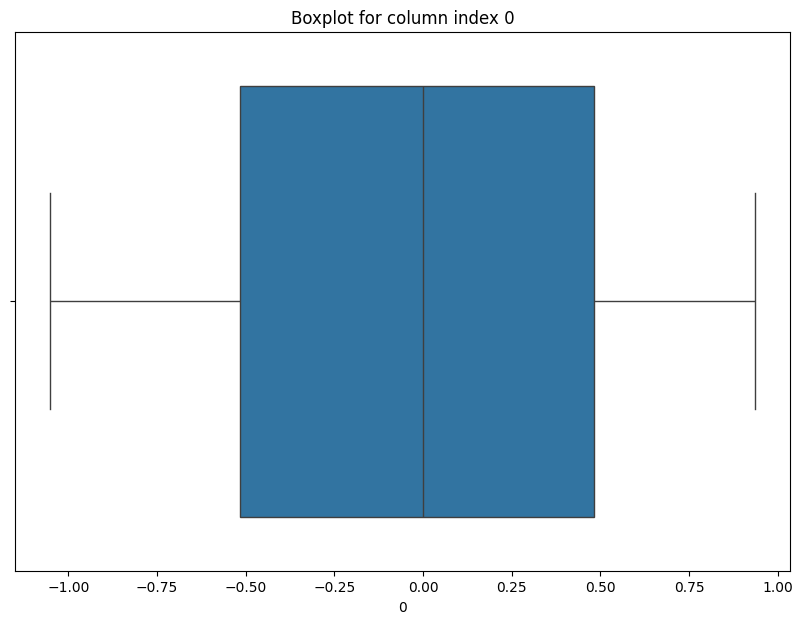

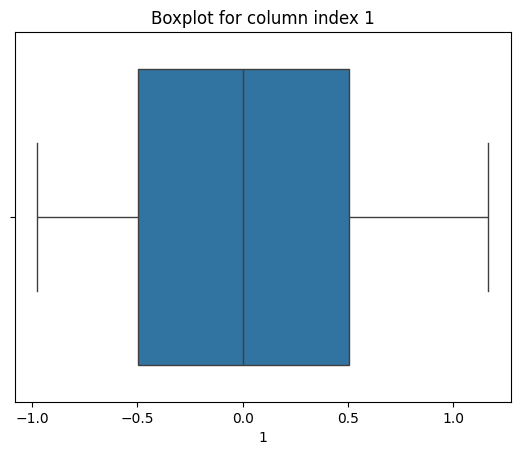

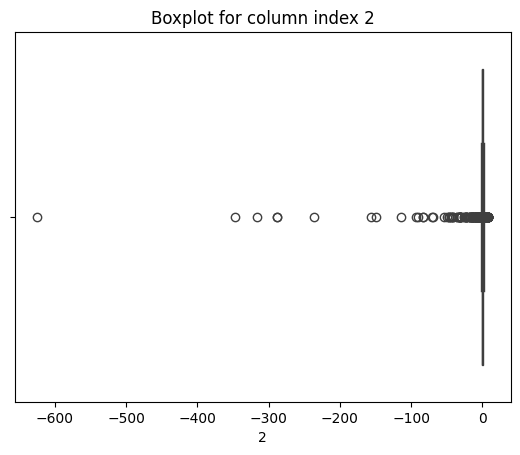

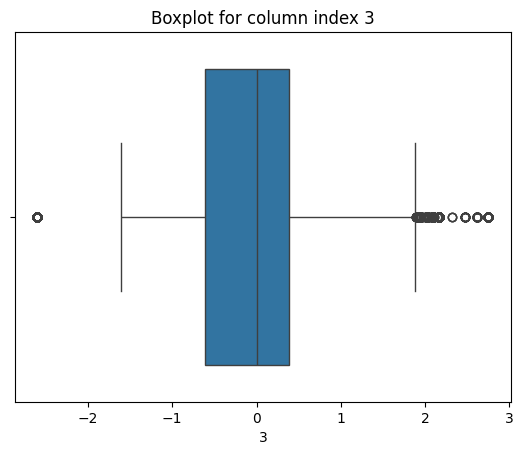

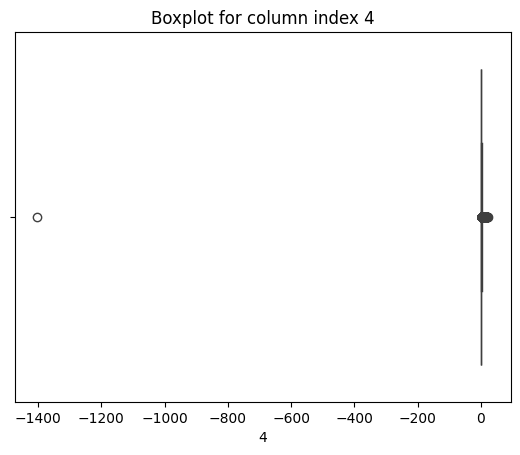

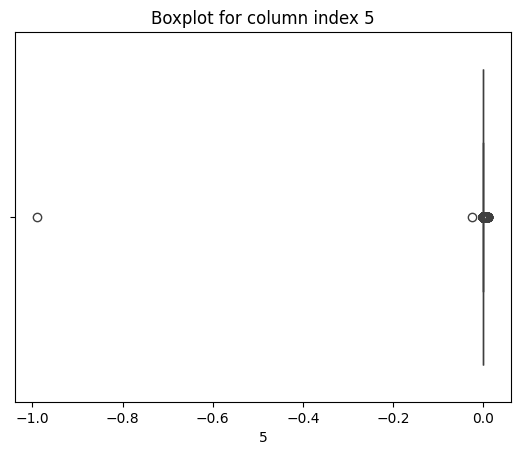

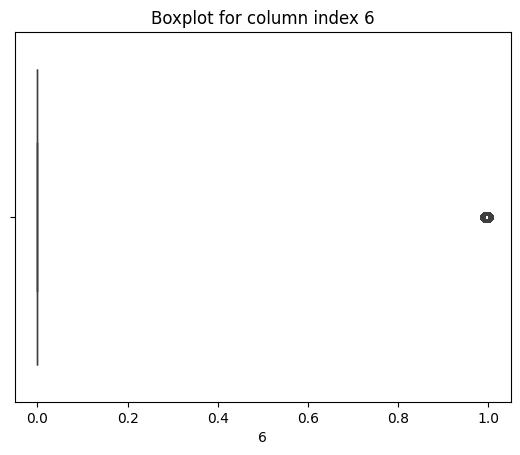

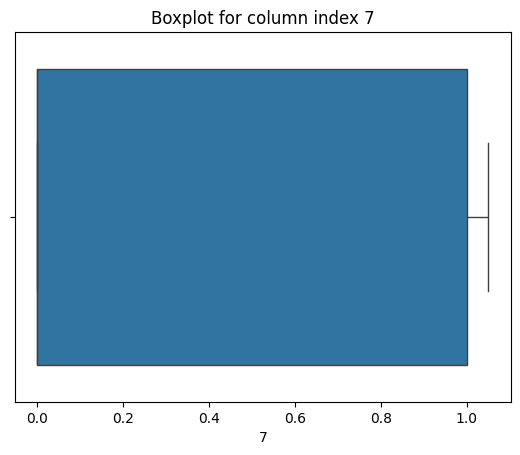

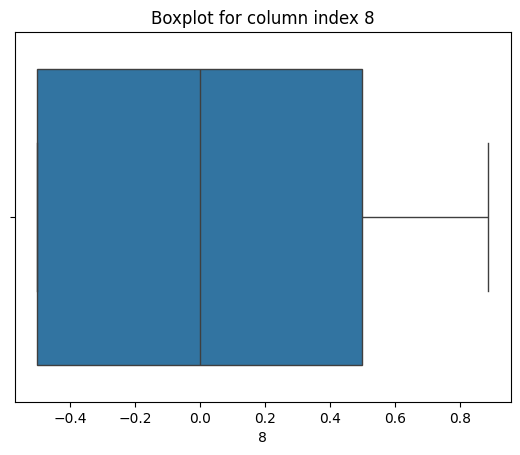

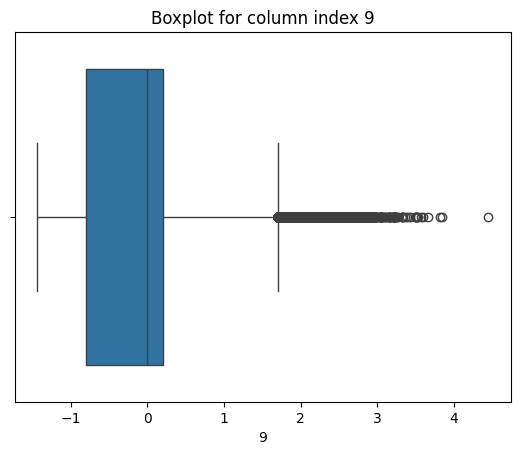

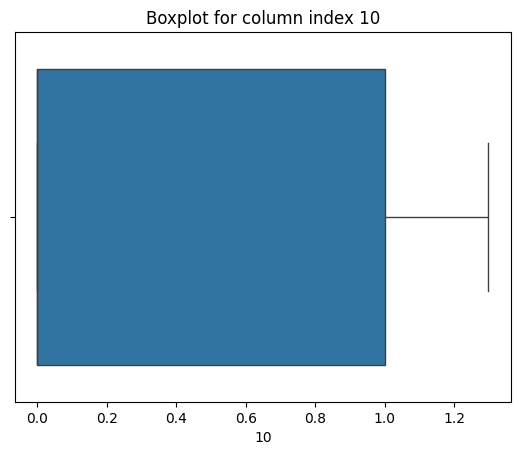

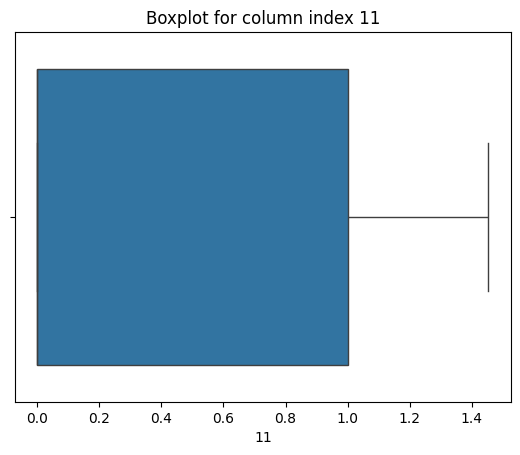

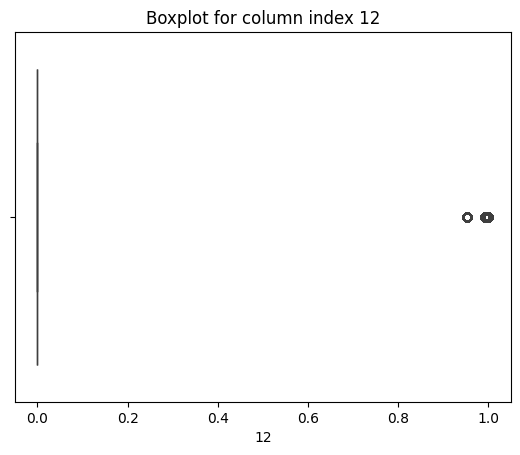

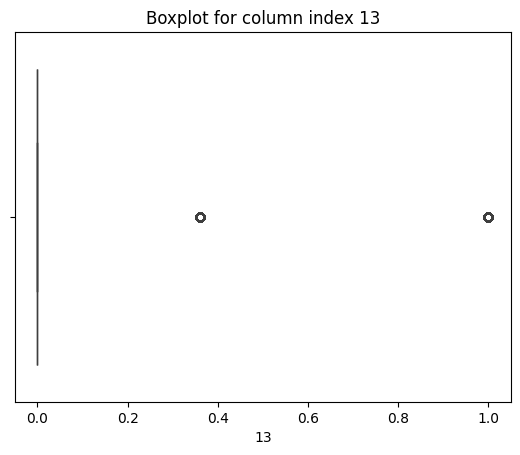

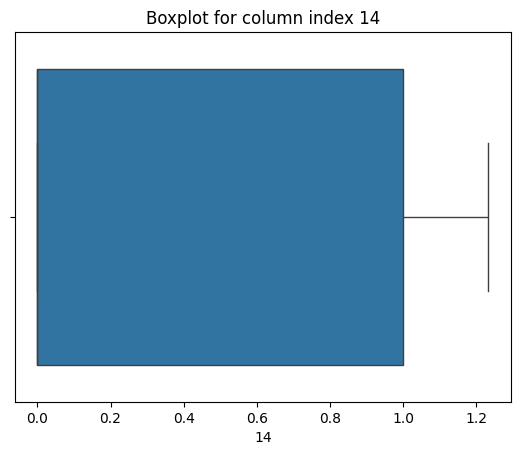

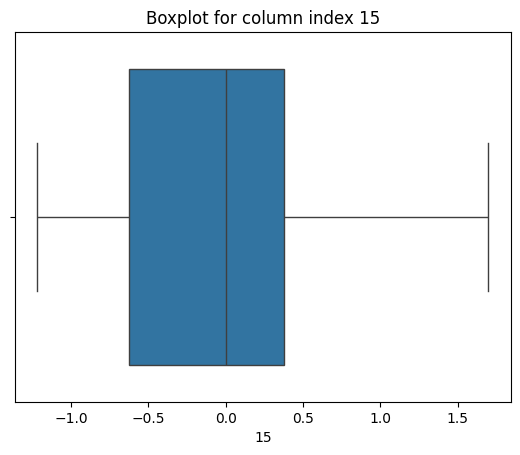

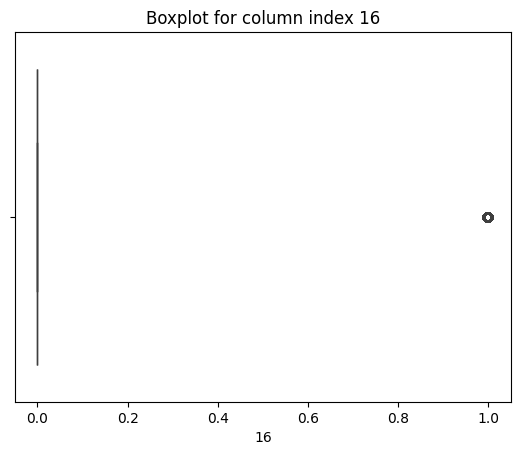

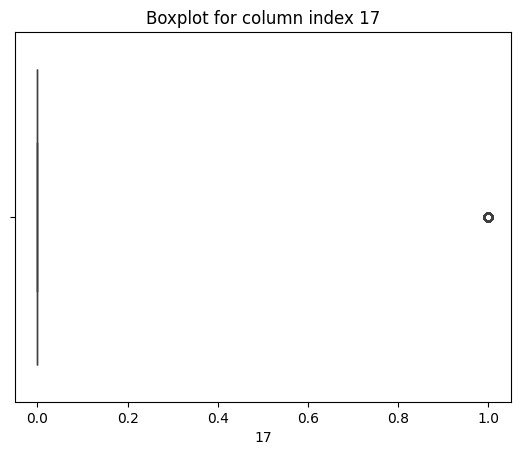

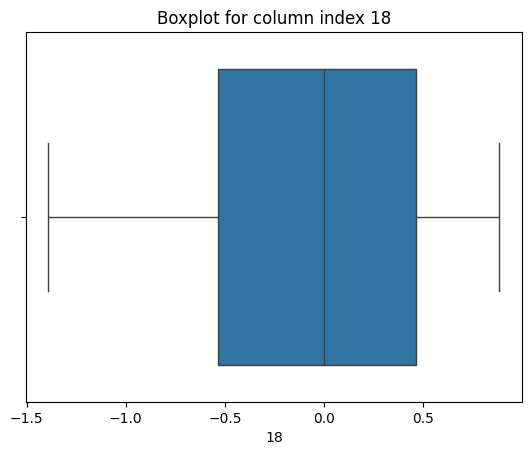

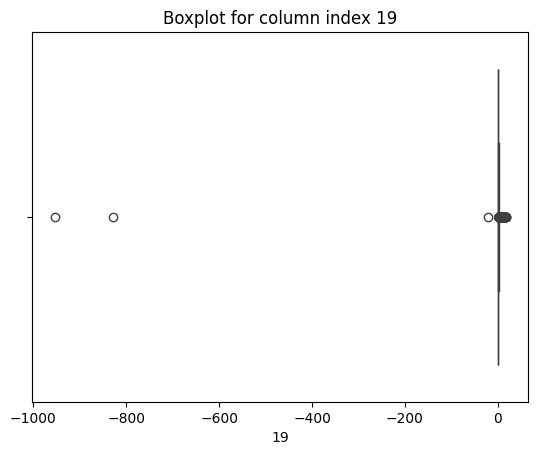

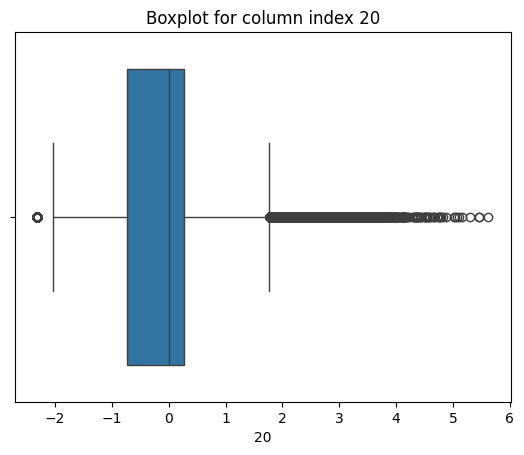

In [32]:
plt.figure(figsize=(10, 7))

for column in new_credit.columns:
    sns.boxplot(x=new_credit[column])

    plt.title(f'Boxplot for column index {column}')

    plt.show()

### GROUPBY LOGIC FUNCTION


In [33]:
credit.head()

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,SK_ID_CURR,AMT_DRAWING_SUM,CNT_DRAWING_SUM
0,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,...,1.0,1,0.0,0.0,69.0,0,0,87788,4500.0,71.0
1,2582071,-82,16809.210,67500,0.0,0.0,0.0,0.0,3375.0,9000.0,...,0.0,0,0.0,0.0,18.0,0,0,87788,0.0,18.0
2,2582071,-84,27577.890,67500,0.0,0.0,0.0,0.0,3375.0,4500.0,...,0.0,0,0.0,0.0,16.0,0,0,87788,0.0,16.0
3,2582071,-7,65159.235,45000,0.0,0.0,0.0,0.0,2250.0,2250.0,...,0.0,0,0.0,0.0,63.0,0,0,87788,0.0,63.0
4,2582071,-59,70475.850,67500,24750.0,24750.0,0.0,0.0,3375.0,4500.0,...,4.0,4,0.0,0.0,41.0,0,0,87788,49500.0,49.0


In [34]:
credit_filter = credit.groupby(["SK_ID_CURR"]).agg({'MONTHS_BALANCE': ['max'],
                                                'AMT_BALANCE' : ['sum','mean','max'],
                                                'AMT_CREDIT_LIMIT_ACTUAL' : ['sum','mean','max'],
                                                'AMT_DRAWINGS_ATM_CURRENT' : ['sum','max'],
                                                'AMT_DRAWINGS_CURRENT' : ['sum','max'],
                                                'AMT_DRAWINGS_OTHER_CURRENT' : ['sum','max'],
                                                'AMT_DRAWINGS_POS_CURRENT' : ['sum','max'],
                                                'AMT_INST_MIN_REGULARITY' : ['mean','min','max'],
                                                'AMT_PAYMENT_CURRENT' : ['mean','min','max'],
                                                'AMT_PAYMENT_TOTAL_CURRENT' : ['mean','min','max'],
                                                'CNT_DRAWINGS_ATM_CURRENT' : ['sum','max'],
                                                'CNT_DRAWINGS_CURRENT' : ['sum','max'],
                                                'CNT_DRAWINGS_OTHER_CURRENT' : ['sum','max'],
                                                'CNT_DRAWINGS_POS_CURRENT' : ['sum','max'],
                                                'CNT_INSTALMENT_MATURE_CUM' : ['sum','max','min'],
                                                'SK_DPD' : ['sum','max'],
                                                'SK_DPD_DEF' : ['sum','max'],
                                                'AMT_DRAWING_SUM' : ['sum'],
                                                'CNT_DRAWING_SUM' : ['sum']})
credit_filter

MONTHS_BALANCE  AMT_BALANCE                             \
                      max          sum           mean         max   
SK_ID_CURR                                                          
0                      -1    53884.035    6735.504375   36569.430   
1                      -1  1324627.920  147180.880000  227526.210   
3                      -1  1368684.630  124425.875455  140704.965   
7                      -1        0.000       0.000000       0.000   
9                      -1     4711.500     428.318182    4711.500   
...                   ...          ...            ...         ...   
307501                 -3        0.000       0.000000       0.000   
307504                 -1   831790.260    8664.481875   50528.790   
307505                 -4        0.000       0.000000       0.000   
307508                 -1        0.000       0.000000       0.000   
307509                 -1   187761.780    1955.851875   94803.210   

           AMT_CREDIT_LIMIT_ACTUAL                         \
                               sum           mean     max   
SK_ID_CURR                                                  
0                          1440000  180000.000000  180000   
1                          2025000  225000.000000  225000   
3                          1485000  135000.000000  135000   
7                          1125000   62500.000000  225000   
9                          1800000  163636.363636  900000   
...                            ...            ...     ...   
307501                     1732500  247500.000000  247500   
307504                     6187500   64453.125000   67500   
307505                      810000  135000.000000  135000   
307508                    16200000  900000.000000  900000   
307509                     2812500   29296.875000  112500   

           AMT_DRAWINGS_ATM_CURRENT           AMT_DRAWINGS_CURRENT  ...  \
                                sum       max                  sum  ...   
SK_ID_CURR                                                          ...   
0                               0.0       0.0           112427.640  ...   
1                          234000.0  180000.0           234000.000  ...   
3                               0.0       0.0           192322.395  ...   
7                               0.0       NaN                0.000  ...   
9                           68400.0   68400.0            68400.000  ...   
...                             ...       ...                  ...  ...   
307501                          0.0       NaN                0.000  ...   
307504                          0.0       0.0            45900.000  ...   
307505                          0.0       NaN                0.000  ...   
307508                          0.0       NaN                0.000  ...   
307509                          0.0       0.0                0.000  ...   

           CNT_DRAWINGS_POS_CURRENT CNT_INSTALMENT_MATURE_CUM             \
                                max                       sum   max  min   
SK_ID_CURR                                                                 
0                              10.0                       2.0   1.0  0.0   
1                               0.0                      36.0   8.0  0.0   
3                              45.0                      45.0   9.0  0.0   
7                               NaN                       0.0   0.0  0.0   
9                               0.0                      10.0   1.0  0.0   
...                             ...                       ...   ...  ...   
307501                          NaN                       0.0   0.0  0.0   
307504                          0.0                    3244.0  40.0  9.0   
307505                          NaN                       0.0   0.0  0.0   
307508                          NaN                       0.0   0.0  0.0   
307509                          0.0                     858.0   9.0  6.0   

           SK_DPD     SK_DPD_DEF     AMT_DRAWING_SUM CNT_DRAWING_SUM  
  